# Analisis exploratorio de datos

### Indice
1.	Carga de información en un DataFrame
2.	Analizando utilizacion de memoria del dataframe
3.	Conversion de Datos y mejoras en uso de memoria
4.	Verificacion de Calidad de Datos
5.	Analizando propiedades especificas del set de datos


## 1) Carga de informacion en un DataFrame

In [3]:
import pandas as pd
df = pd.read_csv("datos/train.csv", sep=",")
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('mode.chained_assignment', None)
pd.options.display.float_format = '{:20,.2f}'.format


%matplotlib inline

import numpy as np

In [5]:
df.sample(3)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
2638,64295,preciosa casa con tejados de madera,<p class=p1>vendo casa con tejados de madera e...,Casa,Cluster 101010. Fraccionamiento Lomas de Angel...,San Andrés Cholula,Puebla,3.00,4.00,2.00,3.00,370.00,252.00,"334,898.00",19.00,-98.26,2014-03-18 00:00:00,0.00,0.00,0.00,1.00,1.00,"3,700,000.00"
8359,139105,casa en venta - alcalá residencial,<p>descripción: preciosa casa al poniente de l...,Casa,NaN,Hermosillo,Sonora,0.00,3.00,0.00,2.00,275.00,263.00,"94,417.00",nan,nan,2013-10-16 00:00:00,0.00,0.00,0.00,0.00,0.00,"2,000,000.00"
96013,293688,"casa en venta, león, león de los aldama, guana...",rcv-0867 casa muy bonita en estado de conse...,Casa,NaN,León,Guanajuato,nan,2.00,2.00,3.00,112.00,90.00,"33,790.00",21.16,-101.67,2016-06-11 00:00:00,0.00,0.00,0.00,0.00,0.00,"800,000.00"


In [4]:
df.loc[0]

id                                                                       254099
titulo                                                        depto. tipo a-402
descripcion                   depto. interior de 80.15m2, consta de sala com...
tipodepropiedad                                                     Apartamento
direccion                                       Avenida Division del Norte 2005
ciudad                                                            Benito Juárez
provincia                                                      Distrito Federal
antiguedad                                                                  NaN
habitaciones                                                               2.00
garages                                                                    1.00
banos                                                                      2.00
metroscubiertos                                                           80.00
metrostotales                           

In [5]:
# dimensiones del DF
print(df.shape)
df.size # rows x col

(240000, 23)


5520000

### 2 Analizando utilizacion de memoria del dataframe

In [6]:
# veo info general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [7]:
# cantidad de elementos elementos no nulos en el data frame
df.count()

id                            240000
titulo                        234613
descripcion                   238381
tipodepropiedad               239954
direccion                     186928
ciudad                        239628
provincia                     239845
antiguedad                    196445
habitaciones                  217529
garages                       202235
banos                         213779
metroscubiertos               222600
metrostotales                 188533
idzona                        211379
lat                           116512
lng                           116512
fecha                         240000
gimnasio                      240000
usosmultiples                 240000
piscina                       240000
escuelascercanas              240000
centroscomercialescercanos    240000
precio                        240000
dtype: int64

### 3.	Conversion de Datos y mejoras en uso de memoria

#### provincia

In [8]:
df.loc[:,['provincia']].memory_usage()

Index             80
provincia    1920000
dtype: int64

In [9]:
df['provincia'].unique().size

33

In [10]:
df['provincia'].value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

In [11]:
# creo una nueva serie en el df de tipo category (enum)
df['provincia'] = df['provincia'].astype('category')

In [12]:
df['provincia'].memory_usage()

241616

In [13]:
df['provincia'].dtype

CategoricalDtype(categories=['Aguascalientes', 'Baja California Norte',
                  'Baja California Sur', 'Campeche', 'Chiapas', 'Chihuahua',
                  'Coahuila', 'Colima', 'Distrito Federal', 'Durango',
                  'Edo. de México', 'Guanajuato', 'Guerrero', 'Hidalgo',
                  'Jalisco', 'Michoacán', 'Morelos', 'Nayarit', 'Nuevo León',
                  'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo',
                  'San luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco',
                  'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatán',
                  'Zacatecas'],
                 ordered=False)

#### Fechas

In [14]:
df.loc[0:0 , 'fecha']

0    2015-08-23 00:00:00
Name: fecha, dtype: object

In [15]:
# Seteamos la fecha al tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])
# generamos una nueva columna obteniendo el año y mes
df['year'] = df['fecha'].dt.year
df['month'] = df['fecha'].dt.month

In [16]:
df.dtypes

id                                     int64
titulo                                object
descripcion                           object
tipodepropiedad                       object
direccion                             object
ciudad                                object
provincia                           category
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                             float64
usosmultiples                        float64
piscina                              float64
escuelascercanas                     float64
centroscomercialescercanos           float64
precio    

#### tipodepropiedad

In [17]:
df['tipodepropiedad'].unique().size

25

In [18]:
df['tipodepropiedad'].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Hospedaje                             1
Garage                                1
Name: tipodepropiedad, dtype: int64

In [19]:
df['tipodepropiedad'] = df['tipodepropiedad'].astype('category')

In [20]:
df['tipodepropiedad'].dtype

CategoricalDtype(categories=['Apartamento', 'Bodega comercial', 'Casa',
                  'Casa en condominio', 'Casa uso de suelo',
                  'Departamento Compartido', 'Duplex', 'Edificio', 'Garage',
                  'Hospedaje', 'Huerta', 'Inmuebles productivos urbanos',
                  'Local Comercial', 'Local en centro comercial', 'Lote',
                  'Nave industrial', 'Oficina comercial', 'Otros',
                  'Quinta Vacacional', 'Rancho', 'Terreno',
                  'Terreno comercial', 'Terreno industrial', 'Villa'],
                 ordered=False)

#### ciudad

In [21]:
df['ciudad'].unique().size

876

In [22]:
df['ciudad'].value_counts()

Querétaro                       12646
Benito Juárez                   11014
Zapopan                         10360
San Luis Potosí                  7925
Mérida                           7162
Monterrey                        6946
Alvaro Obregón                   6633
Cuauhtémoc                       6614
Naucalpan de Juárez              6554
Miguel Hidalgo                   5795
Atizapán de Zaragoza             5783
Tlalpan                          5721
Huixquilucan                     5718
Coyoacán                         5293
Puebla                           4636
Guadalajara                      4006
San Andrés Cholula               3805
Cancún                           3779
Cuernavaca                       3775
Chihuahua                        3757
Tlalnepantla de Baz              3588
Cuautitlán Izcalli               3408
Tlajomulco de Zúñiga             3254
Gustavo A. Madero                3141
Iztapalapa                       3093
Cuajimalpa de Morelos            3020
Tijuana     

In [23]:
df['ciudad'] = df['ciudad'].astype('category')

In [24]:
df['ciudad'].dtype

CategoricalDtype(categories=['Abalá', 'Abasolo', 'Abejones', 'Acajete', 'Acambay',
                  'Acaponeta', 'Acapulco de Juárez', 'Acateno', 'Acatic',
                  'Acatzingo',
                  ...
                  'Zitácuaro', 'Zumpahuacán', 'Zumpango', 'otra', 'ácatlán',
                  'ácatlán de Juárez', 'ácaxochitlán', 'ácámbaro',
                  'áutlán de Navarro', 'áyotlán'],
                 ordered=False)

In [25]:
df.dtypes

id                                     int64
titulo                                object
descripcion                           object
tipodepropiedad                     category
direccion                             object
ciudad                              category
provincia                           category
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                             float64
usosmultiples                        float64
piscina                              float64
escuelascercanas                     float64
centroscomercialescercanos           float64
precio    


## 4.	Verificacion de Calidad de Datos

In [26]:
# metricas generales 
df.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,year,month
count,"240,000.00","196,445.00","217,529.00","202,235.00","213,779.00","222,600.00","188,533.00","211,379.00","116,512.00","116,512.00","240,000.00","240,000.00","240,000.00","240,000.00","240,000.00","240,000.00","240,000.00","240,000.00"
mean,"149,969.38",8.12,2.90,1.55,2.13,174.02,176.77,"2,423,467.82",20.70,-99.51,0.06,0.06,0.09,0.44,0.40,"2,530,838.35","2,014.68",7.44
std,"86,634.58",9.55,0.90,0.85,0.91,98.15,94.43,"10,567,938.36",3.14,9.74,0.24,0.23,0.28,0.50,0.49,"2,152,551.80",1.36,3.56
min,1.00,0.00,1.00,0.00,1.00,15.00,15.00,22.00,-100.89,-125.86,0.00,0.00,0.00,0.00,0.00,"310,000.00","2,012.00",1.00
25%,"74,930.75",0.00,2.00,1.00,1.00,90.00,102.00,"24,890.00",19.36,-100.98,0.00,0.00,0.00,0.00,0.00,"952,772.50","2,014.00",4.00
50%,"149,875.50",5.00,3.00,2.00,2.00,153.00,155.00,"56,383.00",19.54,-99.24,0.00,0.00,0.00,0.00,0.00,"1,850,000.00","2,015.00",8.00
75%,"225,016.50",10.00,3.00,2.00,3.00,240.00,238.00,"87,838.00",20.74,-99.13,0.00,0.00,0.00,1.00,1.00,"3,390,000.00","2,016.00",11.00
max,"299,999.00",80.00,10.00,3.00,4.00,439.00,439.00,"50,003,999.00",83.03,121.04,1.00,1.00,1.00,1.00,1.00,"12,525,000.00","2,016.00",12.00


In [27]:
# ver los nulos si existen
df.isnull().any()

id                            False
titulo                         True
descripcion                    True
tipodepropiedad                True
direccion                      True
ciudad                         True
provincia                      True
antiguedad                     True
habitaciones                   True
garages                        True
banos                          True
metroscubiertos                True
metrostotales                  True
idzona                         True
lat                            True
lng                            True
fecha                         False
gimnasio                      False
usosmultiples                 False
piscina                       False
escuelascercanas              False
centroscomercialescercanos    False
precio                        False
year                          False
month                         False
dtype: bool

In [28]:
df.isnull().sum()

id                                 0
titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
year                               0
month                              0
dtype: int64

In [29]:
nulos = pd.DataFrame(df.isnull().sum(), columns=['Nulos'])
nulos['Porcentaje %'] = round(100*nulos['Nulos'] / len(df), 2)
nulos.sort_values ('Porcentaje %', ascending=False)

,Nulos,Porcentaje %
lng,123488,51.45
lat,123488,51.45
direccion,53072,22.11
metrostotales,51467,21.44
antiguedad,43555,18.15
garages,37765,15.74
idzona,28621,11.93
banos,26221,10.93
habitaciones,22471,9.36
metroscubiertos,17400,7.25


In [30]:
nulos.index = nulos.index.set_names(['feature'])
nulos = nulos.reset_index(level='feature')
features = nulos.feature.unique()

In [74]:
total = 240000
N = len(features)
porc_valor = nulos['Porcentaje %'].map(lambda x: total*((100 - x)/100))
porc_nulos = nulos['Porcentaje %'].map(lambda x: total*(x/100))
ind = np.arange(N)  
width = 0.50      

p1 = plt.bar(ind, porc_valor, width, color='lightblue')
p2 = plt.bar(ind, porc_nulos, width,bottom=porc_valor, color='red')

plt.ylabel('Cantidad de filas')
plt.xlabel('features')
plt.title('Cantidad de nulos sobre valores asignados')
plt.xticks(ind, features)
plt.xticks(rotation=90)
#plt.yticks(np.arange(0, 100, 10))
plt.legend((p1[0], p2[0]), ('con valor', 'nulos'))
plt.rcParams['figure.figsize'] = [10, 10]
ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
plt.show()

NameError: name 'features' is not defined

### IDs

In [132]:
# Verifico si son unicos los IDs
df['id'].unique().size == df['id'].count()

True

### Direcciones

In [134]:
# Verifico si son unicas las direcciones
df['direccion'].unique().size == df['direccion'].count()

False

### vamos a buscar cuales son las direcciones duplicadas

In [201]:
# esta funcion devueve las celdas duplicadas
def fduplicados (data, limite):
    return data['Repeticiones'].sum() >= limite

In [202]:
df1 = df.copy()
df1['Repeticiones'] = 1

In [203]:
agrupados = df1.groupby(['direccion'])

In [204]:
agrupadosfiltrados = agrupados.filter(fduplicados, limite=2)

In [205]:
repetidos =agrupadosfiltrados.groupby(['direccion']).agg({'Repeticiones':'sum'})
repetidos.reset_index(inplace=True)

In [206]:
print ("Cantidad de direcciones repetidas")
repetidos["Repeticiones"].sum()

Cantidad de direcciones repetidas


63009

In [207]:
print ("Ranking de direcciones mas repetidas")
repetidos.nlargest(10,'Repeticiones')

Ranking de direcciones mas repetidas


,direccion,Repeticiones
35,-,660
64,.,476
85,1,212
3817,Calle,194
10195,Norte de Mérida,136
16308,x #x,122
77,0,113
15399,domicilio conocido,105
3847,Calle 18 No.344 x 11 y 13 Col. Camara de Comer...,94
15074,calle,94


In [197]:
#con esto accedo directamente
df.loc[df['direccion'].isin(["CASCATA"]), :]

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
160073,164116,casa lomas de angelopolis,lujos espacios ubicación y plenitud en cluster...,Casa,CASCATA,San Andrés Cholula,Puebla,nan,3.00,2.00,...,"334,898.00",nan,nan,2015-04-12 00:00:00,1.00,0.00,0.00,0.00,0.00,"1,730,000.00"
208408,70102,"lomas angelopolis, exclusivo terreno¡",nuevo cluster residencial llamado gran reserv...,Terreno,CASCATA,San Andrés Cholula,Puebla,nan,nan,0.00,...,"334,898.00",nan,nan,2016-12-05 00:00:00,0.00,0.00,0.00,1.00,1.00,"1,900,000.00"
230351,260226,venta casa en lomas de angelopolis cascata en...,magnifico diseño y acabados casas en pre- vent...,Casa en condominio,CASCATA,San Andrés Cholula,Puebla,0.00,4.00,2.00,...,"334,898.00",18.98,-98.29,2016-03-17 00:00:00,0.00,1.00,0.00,1.00,1.00,"2,700,000.00"


## 5) Analizando propiedades especificas del set de datos

In [18]:
# Revisemos alguna caterogia principal para ver como esta compuesta:


## 01 Inmuebles ------------------------------------------------------------------***TP2

In [75]:
# Analizamos que features son numericas para correlacionarlas
features_numericas = df.select_dtypes(include=[np.number])
features_numericas.dtypes

# Observamos tambien cuales son las features categoricas
categoricas = df.select_dtypes(exclude=[np.number])
print(categoricas.dtypes)
categoricas.describe()

titulo             object
descripcion        object
tipodepropiedad    object
direccion          object
ciudad             object
provincia          object
fecha              object
dtype: object


,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,fecha
count,234613,238381,239954,186928,239628,239845,240000
unique,186191,232187,24,140269,875,32,1830
top,casa en venta,empresa dedicada a los ante notario y regist...,Casa,-,Querétaro,Distrito Federal,2016-12-03 00:00:00
freq,468,119,141717,660,12646,58790,1416


Text(0.5, 1, 'Matriz de correlaciones como heatmap')

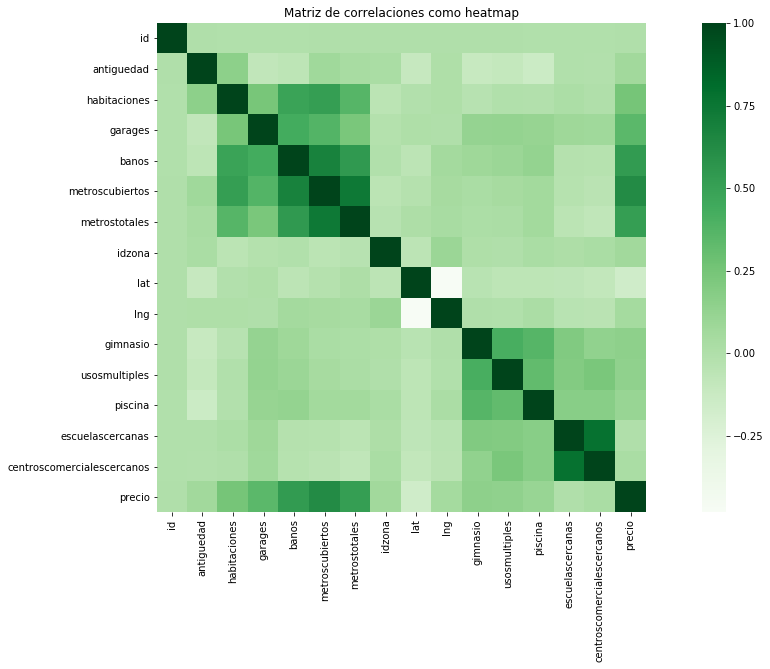

In [76]:
# Matriz de correlaciones como heatmap
corr = features_numericas.corr()
plt.subplots(figsize=(20, 9))
sns.heatmap(corr, square=True, cmap='Greens')
plt.title("Matriz de correlaciones como heatmap")

## Cantidad de inmuebles por tipo de propiedad

In [10]:
propiedades = df ['tipodepropiedad']

In [11]:
propiedades.value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

Total tipos de propiedad: 24


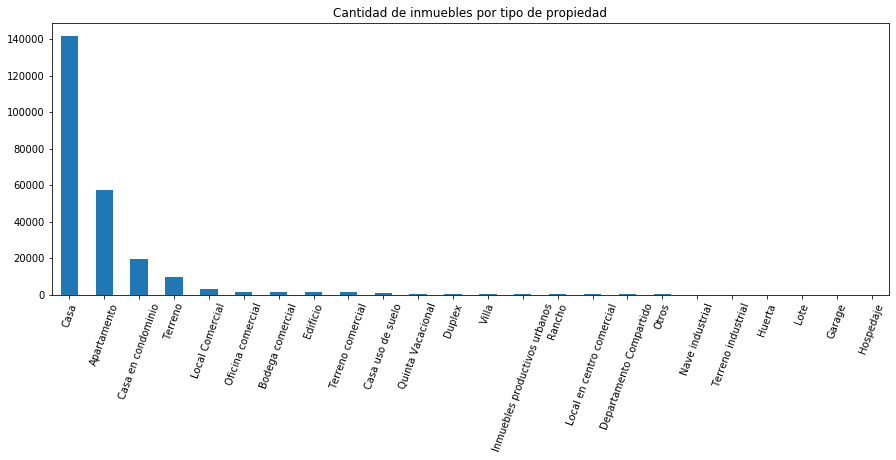

In [12]:
print(f"Total tipos de propiedad: {propiedades.nunique()}")
propiedades.value_counts().plot(kind='bar', figsize=(15, 5), rot=70, 
title="Cantidad de inmuebles por tipo de propiedad");

#####  Antiguedad de los inmuebles (18% nulos)

In [210]:
antiguedad = df ['antiguedad']

In [212]:
antiguedad.value_counts()

 0.00    50335
 5.00    33268
10.00    28844
20.00    19904
 1.00    12353
 4.00     7944
 3.00     5616
 2.00     5059
15.00     3965
 6.00     3169
30.00     3055
 8.00     2418
25.00     2297
 7.00     2046
12.00     1492
11.00     1434
40.00     1347
50.00     1193
 9.00     1065
35.00      938
18.00      908
21.00      742
16.00      700
14.00      616
13.00      577
17.00      529
22.00      448
28.00      396
26.00      369
45.00      329
         ...  
47.00       40
55.00       38
48.00       36
46.00       31
70.00       29
41.00       27
80.00       27
53.00       17
49.00       17
65.00       17
52.00       11
58.00       10
54.00        9
75.00        6
66.00        5
59.00        5
69.00        5
67.00        4
57.00        4
63.00        4
62.00        3
56.00        3
74.00        2
68.00        2
79.00        2
61.00        2
76.00        2
71.00        1
77.00        1
64.00        1
Name: antiguedad, Length: 78, dtype: int64

Text(0, 0.5, 'cantidad')

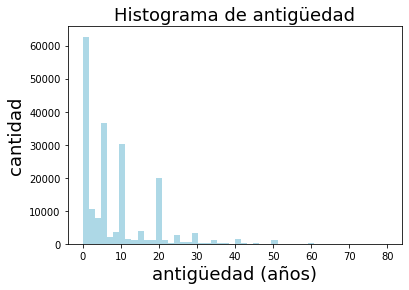

In [77]:
df1 = df.dropna(subset=['antiguedad'])
#df1['antiguedad_log'] = np.log(df1['antiguedad'])
#df1['antiguedad_log'] = df1['antiguedad_log'].replace([np.inf, -np.inf], np.nan)

g = df1['antiguedad'].plot.hist(bins=50, color='lightblue')
g.set_title("Histograma de antigüedad", fontsize=18)
g.set_xlabel("antigüedad (años)",fontsize=18)
g.set_ylabel("cantidad", fontsize=18)

Text(0, 0.5, 'Densidad')

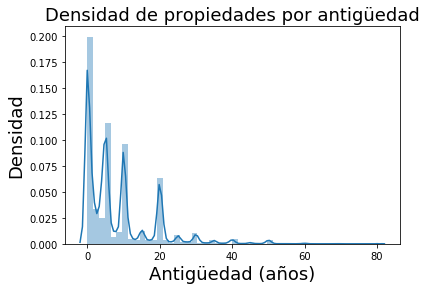

In [78]:
g = sns.distplot(df1["antiguedad"], bins=50)
g.set_title("Densidad de propiedades por antigüedad", fontsize=18)
g.set_xlabel("Antigüedad (años)",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

### 3 )dado que casa, apartamento y casa en condominio concentran mas del 90% de las publicaciones
### a)vamos a realizar un informe pormenorizado de las mismas.

In [ ]:
## Densidad propiedades por antiguedad (comparacion de 3 tipos)

In [ ]:
# hay que hacer un grafico de desidad casa x antiguedad, apartamento x antiguedad ......   y luego unir los 3 en un solo grafico

In [51]:
df1 = df.dropna(subset=['antiguedad'])
casas= df1.loc[df['tipodepropiedad'] == "Casa", :]


In [52]:
casas['antiguedad'].value_counts()

 0.00    30727
 5.00    20052
10.00    17920
20.00    12148
 1.00     6867
 4.00     4550
 3.00     3163
 2.00     2820
15.00     2502
30.00     1924
 6.00     1906
 8.00     1559
25.00     1484
 7.00     1213
11.00      979
12.00      914
40.00      869
50.00      719
 9.00      665
35.00      603
18.00      566
21.00      530
16.00      406
14.00      382
13.00      374
17.00      306
22.00      271
26.00      235
28.00      230
45.00      214
         ...  
44.00       29
51.00       27
47.00       26
43.00       26
55.00       23
48.00       23
80.00       21
70.00       20
41.00       19
46.00       17
49.00       13
65.00       12
53.00       11
58.00        6
54.00        5
69.00        4
66.00        4
75.00        4
57.00        4
59.00        4
52.00        3
56.00        3
62.00        3
61.00        2
67.00        2
63.00        2
74.00        1
77.00        1
71.00        1
68.00        1
Name: antiguedad, Length: 75, dtype: int64

Text(0, 0.5, 'Cantidad de Casas')

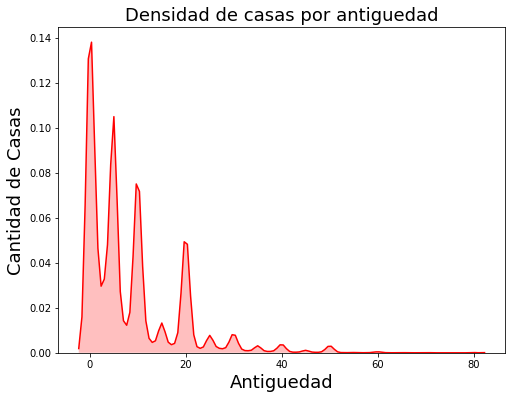

In [116]:
plt.figure(figsize=(8, 6))



g = sns.distplot(casas["antiguedad"], color='red', bins=50, hist=False, kde_kws={"shade": True})
g.set_title("Densidad de casas por antiguedad", fontsize=18)
g.set_xlabel("Antiguedad",fontsize=18)
g.set_ylabel("Cantidad de Casas", fontsize=18)


In [54]:

apartamentos= df1.loc[df ['tipodepropiedad'] == "Apartamento", :]

In [55]:
apartamentos['antiguedad'].value_counts()

 0.00    10760
 5.00     8675
10.00     7149
20.00     5365
 1.00     3255
 4.00     2196
 3.00     1553
 2.00     1470
15.00      932
 6.00      763
30.00      762
25.00      553
 7.00      538
 8.00      499
12.00      354
40.00      318
50.00      271
 9.00      256
11.00      247
35.00      241
18.00      211
16.00      192
14.00      137
17.00      128
13.00      127
28.00      118
21.00      115
22.00      110
45.00       95
26.00       92
         ...  
38.00       40
34.00       32
36.00       29
37.00       28
39.00       21
31.00       21
42.00       17
43.00       13
46.00       12
47.00       11
44.00       11
55.00       11
48.00       10
51.00        9
52.00        7
41.00        7
53.00        5
70.00        4
80.00        3
54.00        3
58.00        3
49.00        3
63.00        2
65.00        2
67.00        2
75.00        1
64.00        1
74.00        1
59.00        1
68.00        1
Name: antiguedad, Length: 68, dtype: int64

Text(0, 0.5, 'Densidad')

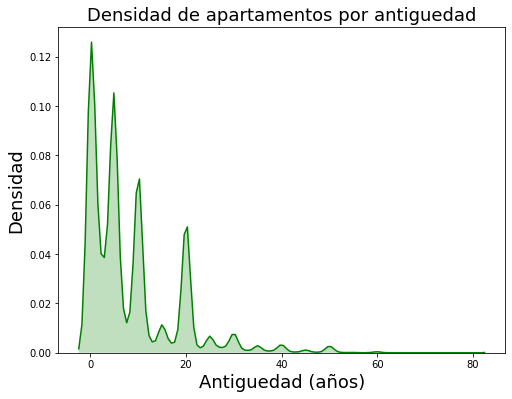

In [117]:
plt.figure(figsize=(8, 6))
g = sns.distplot(apartamentos["antiguedad"], color='green', bins=50, hist=False, kde_kws={"shade": True})
g.set_title("Densidad de apartamentos por antiguedad", fontsize=18)
g.set_xlabel("Antiguedad (años)",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

In [57]:
casaencondominio= df1.loc[df ['tipodepropiedad'] == "Casa en condominio", :]

In [58]:
casaencondominio['antiguedad'].value_counts()

 0.00    3833
 5.00    3119
10.00    2165
 1.00    1528
 4.00     897
20.00     895
 3.00     667
 2.00     540
 6.00     350
15.00     317
 8.00     293
 7.00     234
12.00     169
30.00     141
25.00     135
 9.00     121
11.00     116
18.00     103
14.00      76
17.00      67
16.00      65
13.00      62
22.00      49
19.00      46
21.00      42
35.00      31
28.00      31
23.00      29
40.00      27
26.00      23
24.00      23
27.00      18
29.00      14
50.00      13
32.00      11
31.00       8
33.00       5
39.00       4
34.00       3
60.00       3
37.00       3
42.00       2
36.00       2
45.00       2
38.00       2
75.00       1
51.00       1
Name: antiguedad, dtype: int64

Text(0, 0.5, 'Cantidad de casaencondominio')

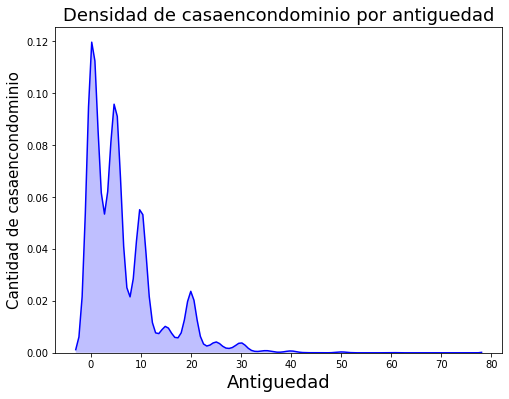

In [118]:
plt.figure(figsize=(8, 6))
g = sns.distplot(casaencondominio["antiguedad"], color='blue', bins=50, hist=False, kde_kws={"shade": True})
g.set_title("Densidad de casaencondominio por antiguedad", fontsize=18)
g.set_xlabel("Antiguedad",fontsize=18)
g.set_ylabel("Cantidad de casaencondominio", fontsize=15)

Text(0.5, 1.0, 'Densidad x Antiguedad cross distribuition')

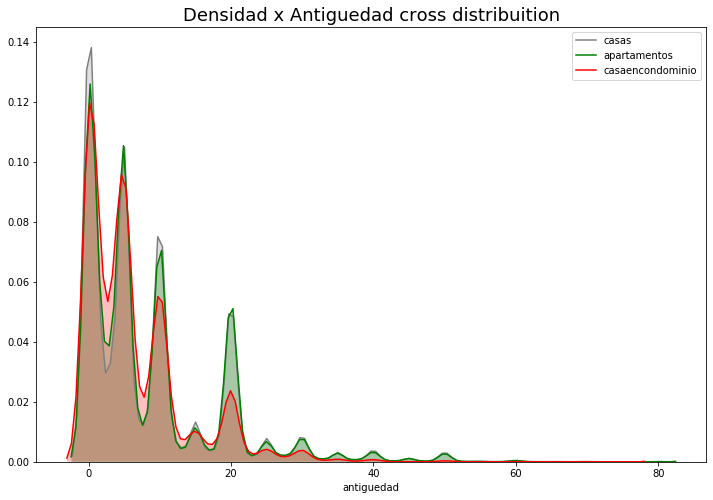

In [122]:
# TODO referencias por color en la visualizacion
plt.figure(figsize=(12,8))
g = sns.distplot(casas["antiguedad"], color='grey', label='casas', hist=False , kde_kws={"shade": True})
g = sns.distplot(apartamentos['antiguedad'], color='green', label='apartamentos', hist=False, kde_kws={"shade": True})
g = sns.distplot(casaencondominio['antiguedad'], color='red', label='casaencondominio', hist=False, kde_kws={"shade": True})
g.set_title("Densidad x Antiguedad cross distribuition", fontsize=18)


## 3B histograma de metros cuadrados   (para los 3 tipos)



In [ ]:
# quiero ver las dimenciones de lo que se esta ofreciendo para esos 3 tipos

In [153]:
metroscasas = casas["metrostotales"]
metroscasas.value_counts()


 90.00    4625
200.00    4455
160.00    4039
120.00    3733
300.00    2892
250.00    2802
140.00    2263
105.00    2177
180.00    2054
150.00    1694
 60.00    1546
100.00    1396
 80.00    1151
400.00    1109
128.00    1080
144.00    1056
130.00    1028
220.00     996
 96.00     976
240.00     955
170.00     911
110.00     846
 70.00     766
126.00     760
112.00     755
 72.00     742
350.00     731
210.00     675
119.00     675
190.00     653
          ... 
439.00      24
427.00      24
421.00      22
429.00      22
433.00      22
423.00      20
 39.00      18
393.00      18
 36.00      16
 32.00      16
 15.00      14
 33.00      12
 38.00      11
 37.00      10
 20.00      10
 16.00      10
 28.00      10
 24.00       8
 25.00       7
 34.00       6
 27.00       6
 17.00       5
 31.00       4
 22.00       4
 26.00       4
 29.00       4
 21.00       3
 18.00       2
 19.00       1
 23.00       1
Name: metrostotales, Length: 425, dtype: int64

Text(0, 0.5, 'cantidad metros')

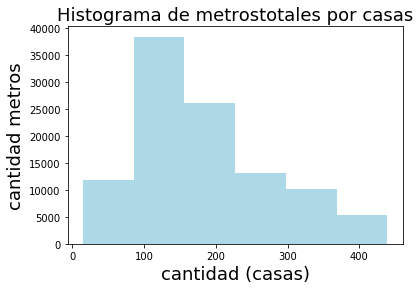

In [155]:
g = casas['metrostotales'].plot.hist(bins=6, color='lightblue')
g.set_title("Histograma de metrostotales por casas", fontsize=18)
g.set_xlabel("cantidad (casas)",fontsize=18)
g.set_ylabel("cantidad metros", fontsize=18)

Text(0, 0.5, 'cantidad metros')

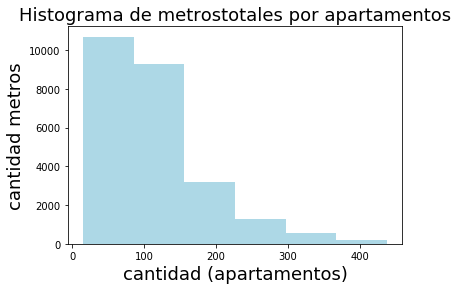

In [156]:
g = apartamentos['metrostotales'].plot.hist(bins=6, color='lightblue')
g.set_title("Histograma de metrostotales por apartamentos", fontsize=18)
g.set_xlabel("cantidad (apartamentos)",fontsize=18)
g.set_ylabel("cantidad metros", fontsize=18)

Text(0, 0.5, 'cantidad metros')

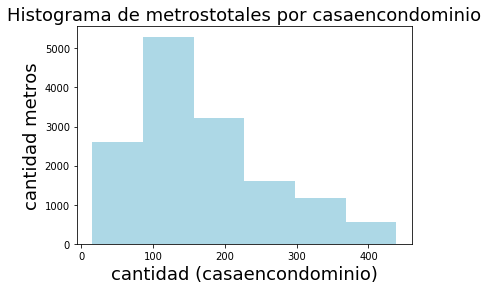

In [157]:
g = casaencondominio['metrostotales'].plot.hist(bins=6, color='lightblue')
g.set_title("Histograma de metrostotales por casaencondominio", fontsize=18)
g.set_xlabel("cantidad (casaencondominio)",fontsize=18)
g.set_ylabel("cantidad metros", fontsize=18)

Text(0.5, 1.0, 'Densidad x metrosTotales cross distribuition')

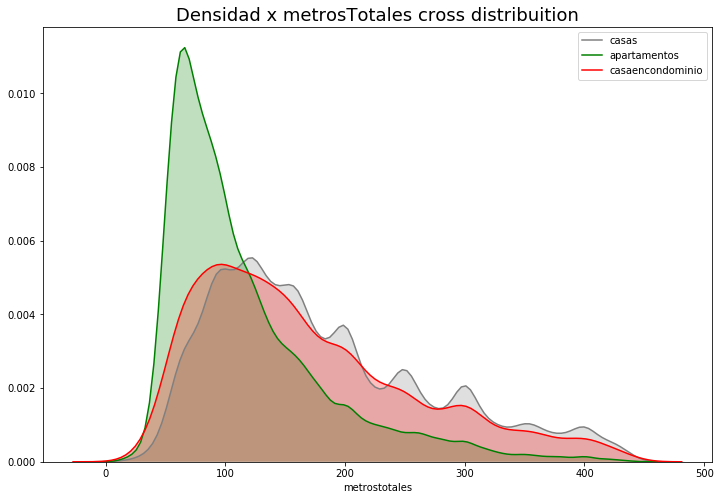

In [159]:
# TODO referencias por color en la visualizacion
plt.figure(figsize=(12,8))
g = sns.distplot(casas["metrostotales"], color='grey', label='casas', hist=False , kde_kws={"shade": True})
g = sns.distplot(apartamentos['metrostotales'], color='green', label='apartamentos', hist=False, kde_kws={"shade": True})
g = sns.distplot(casaencondominio['metrostotales'], color='red', label='casaencondominio', hist=False, kde_kws={"shade": True})
g.set_title("Densidad x metrosTotales cross distribuition", fontsize=18)


## 3C matriz de correlacion para cada uno de los tipos

In [25]:
# matriz de correlacion para las casas, apartamentos y  casa en condominio...
# esto es para ver que como se relacionan las variables especificamente para cada una de ellas.
#asi puedo profundizar por separado.


## casas

In [146]:
# Analizamos que features son numericas para correlacionarlas
features_numericas = casas.select_dtypes(include=[np.number])

Text(0.5, 1, 'Matriz de correlaciones de casas como heatmap')

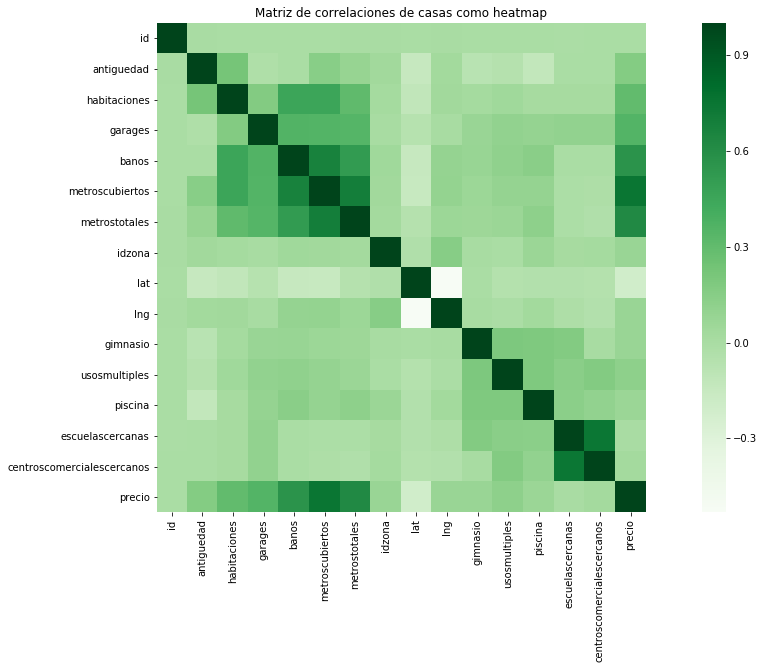

In [147]:
# Matriz de correlaciones como heatmap
corr = features_numericas.corr()
plt.subplots(figsize=(20, 9))
sns.heatmap(corr, square=True, cmap='Greens')
plt.title("Matriz de correlaciones de casas como heatmap")

## apartamentos

In [148]:
# Analizamos que features son numericas para correlacionarlas
features_numericas = apartamentos.select_dtypes(include=[np.number])

Text(0.5, 1, 'Matriz de correlaciones de apartamentos como heatmap')

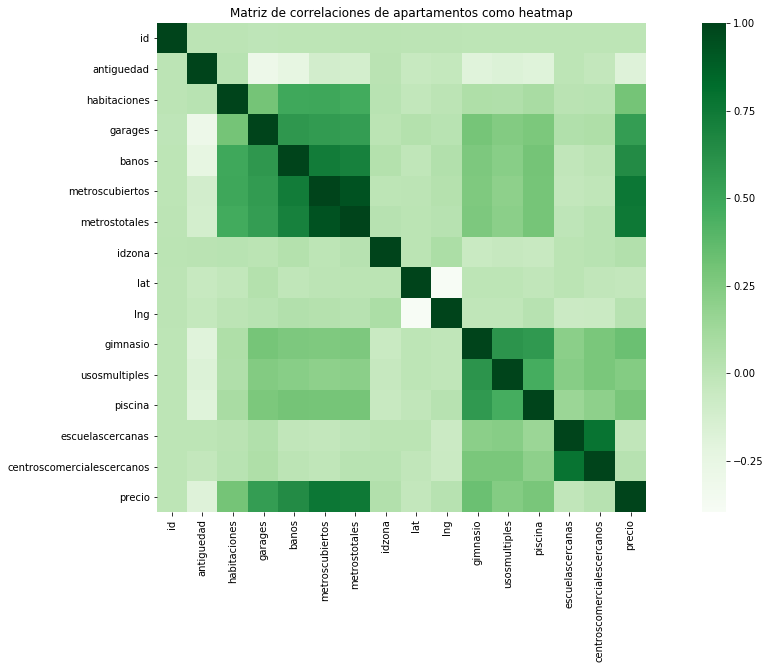

In [149]:
# Matriz de correlaciones como heatmap
corr = features_numericas.corr()
plt.subplots(figsize=(20, 9))
sns.heatmap(corr, square=True, cmap='Greens')
plt.title("Matriz de correlaciones de apartamentos como heatmap")

## casaencondominio

In [150]:
# Analizamos que features son numericas para correlacionarlas
features_numericas = casaencondominio.select_dtypes(include=[np.number])

Text(0.5, 1, 'Matriz de correlaciones de casas en condominio como heatmap')

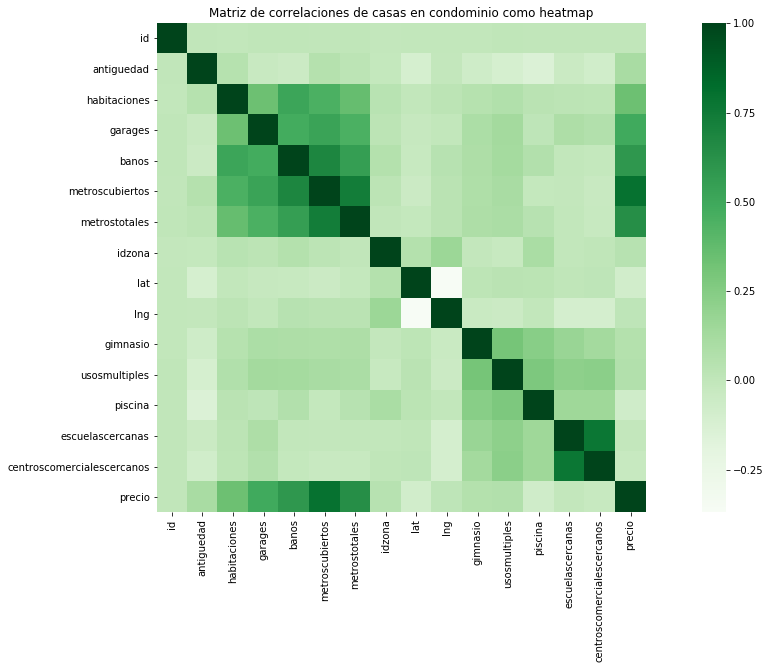

In [151]:
# Matriz de correlaciones como heatmap
corr = features_numericas.corr()
plt.subplots(figsize=(20, 9))
sns.heatmap(corr, square=True, cmap='Greens')
plt.title("Matriz de correlaciones de casas en condominio como heatmap")

# 3D luego explorar relaciones, seguramente baños, habitaciones (piscina gimnacio)

#  3E Por ultimo para el resto de las propiedades, veamos el promedio de metros cuadrados de lo ofrecido. (es el 10% del as ofertas)

##### Cantidad de banos que tienen los inmuebles

In [213]:
banos = df ['banos']

In [214]:
banos.value_counts()

2.00    87683
1.00    58173
3.00    49365
4.00    18558
Name: banos, dtype: int64

Text(0, 0.5, 'cantidad inmuebles')

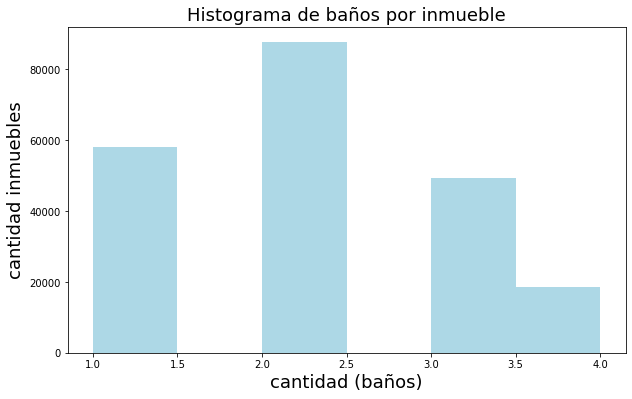

In [163]:
plt.figure(figsize=(10,6))
g = df['banos'].plot.hist(bins=6, color='lightblue')
g.set_title("Histograma de baños por inmueble", fontsize=18)
g.set_xlabel("cantidad (baños)",fontsize=18)
g.set_ylabel("cantidad inmuebles", fontsize=18)